### CUSTOMER SEGMENTATION
---

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import seaborn as sns
import geopandas
import datetime
import itertools

### Functions

In [2]:
from src.functions.utils import remove_cancelled_transactions
from src.functions.utils import products_per_customer_per_country

### Reading data

In [3]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

In [4]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Processing data

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df_correct_type = df.astype({
    "StockCode": "str",
    "Description": "str",
    "InvoiceDate": "datetime64[ns]",
    "Country": "str"
})

In [7]:
print("Number of duplicated rows: {0}".format(df_correct_type.duplicated().sum()))

Number of duplicated rows: 5268


In [8]:
df_correct_type.drop_duplicates(inplace=True)

### Exploring the content of variables

This dataframe contains 8 variables that correspond to:

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

#### Countries

In [9]:
countries = df_correct_type["Country"].value_counts()
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
layout = dict(title='Interactive map: number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

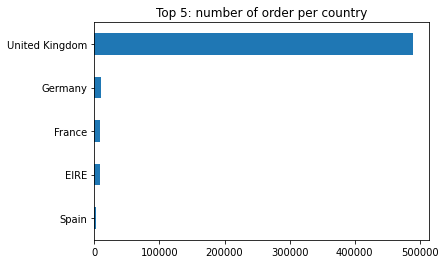

In [10]:
countries[0:5].sort_values().plot(kind = 'barh')
plt.title("Top 5: number of order per country")
plt.show()

#### Customers

In [11]:
df_correct_type.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
unique_customers_id = df_correct_type["CustomerID"].nunique()
print("Number of unique customers: {0}".format(unique_customers_id))

Number of unique customers: 4372


In [13]:
df_non_cancelled_transactions = remove_cancelled_transactions(df_correct_type)
temp_table = df_non_cancelled_transactions.groupby(
    by=['CustomerID']
    ,as_index=False
)['InvoiceDate'].count()
products_per_customer = temp_table.rename(
    columns = {'InvoiceDate':'Number_of_products'}
)

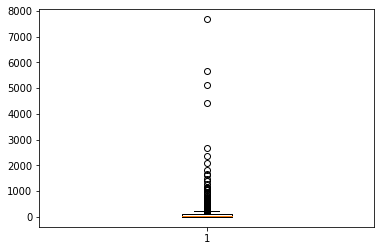

In [14]:
plt.boxplot(products_per_customer["Number_of_products"].tolist())
plt.show()

In [15]:
products_per_customer_mean = int(products_per_customer["Number_of_products"].mean())
products_per_customer_median = int(products_per_customer["Number_of_products"].median())
products_per_customer_max = int(products_per_customer["Number_of_products"].max())
products_per_customer_min = int(products_per_customer["Number_of_products"].min())
print("Mean (products per customers): {0}".format(products_per_customer_mean))
print("Median (products per customers): {0}".format(products_per_customer_median))
print("Max (products per customers): {0}".format(products_per_customer_max))
print("Min (products per customers): {0}".format(products_per_customer_min))

Mean (products per customers): 90
Median (products per customers): 41
Max (products per customers): 7676
Min (products per customers): 1


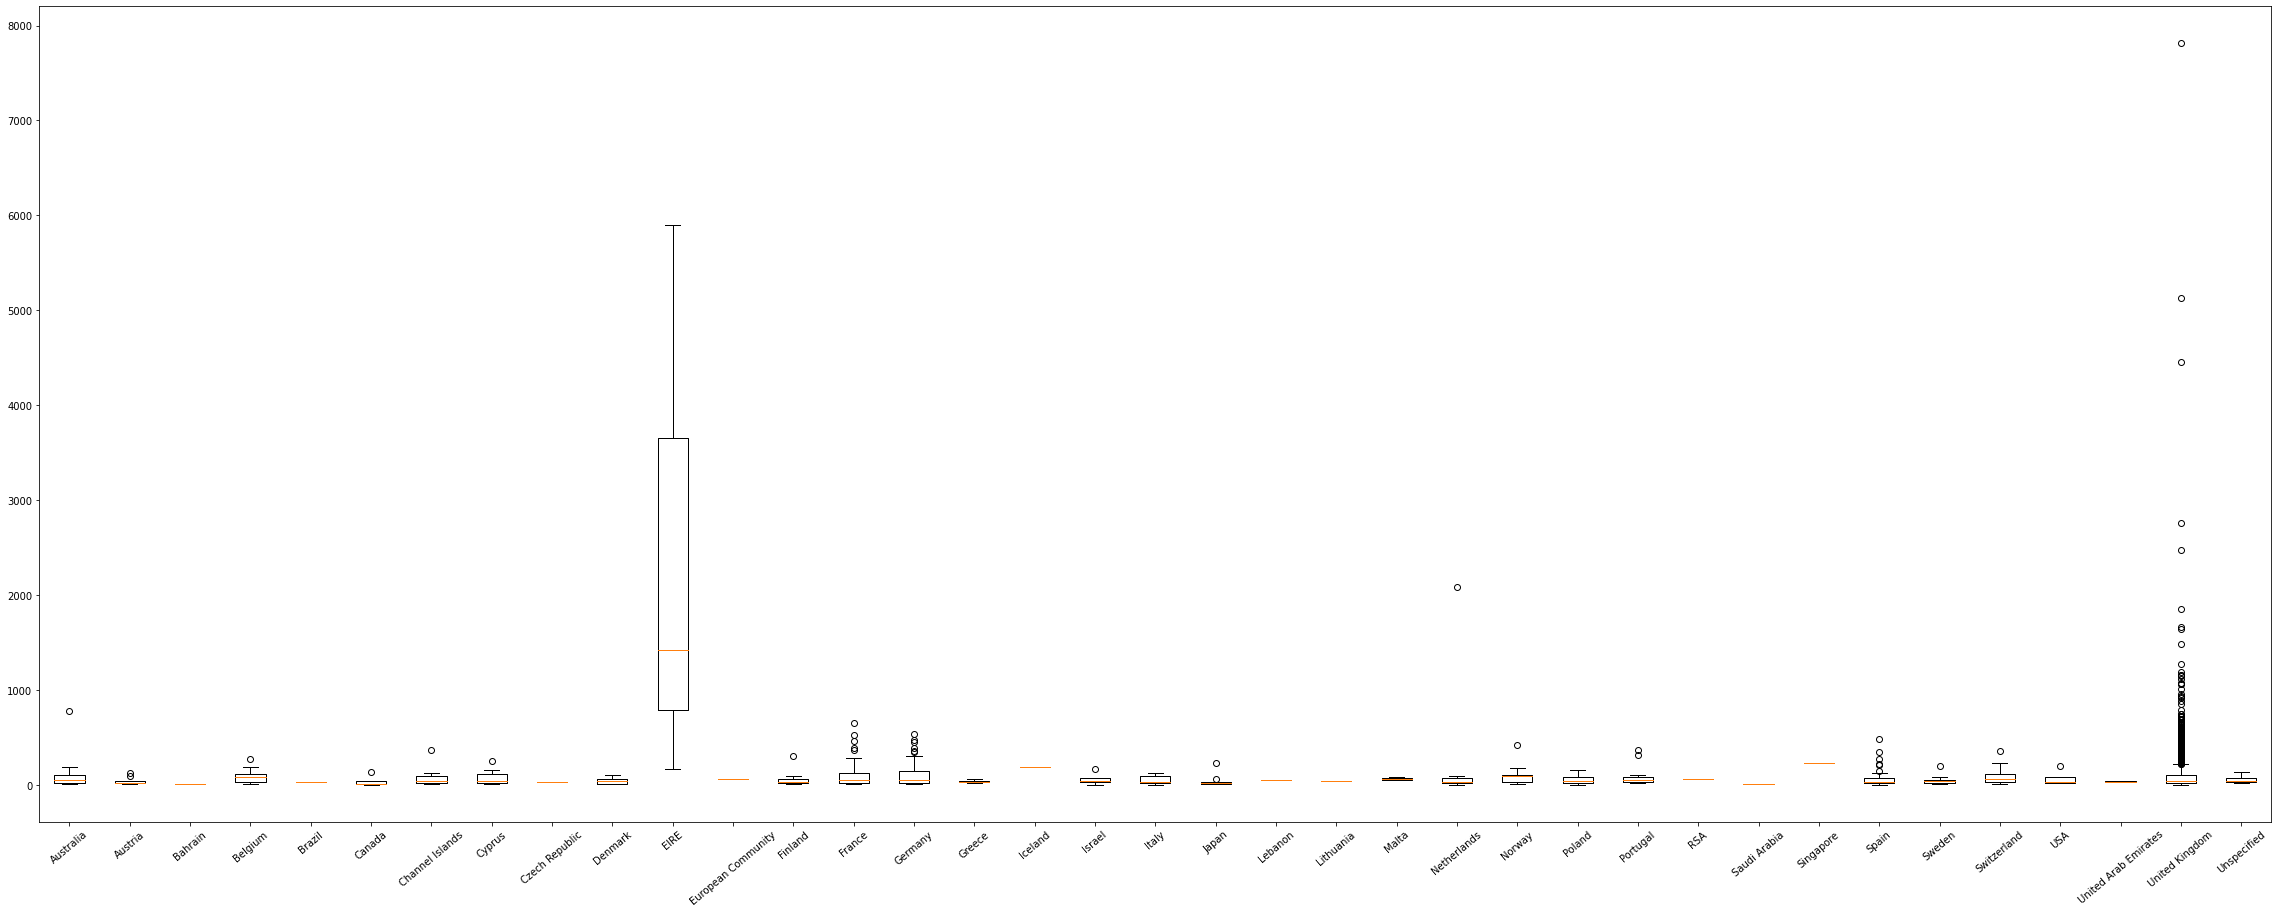

In [28]:
prepared_data = products_per_customer_per_country(df_correct_type)
fig, ax = plt.subplots(figsize=(40, 15))
ax.boxplot(prepared_data.values())
ax.set_xticklabels(prepared_data.keys(), rotation=40)
plt.show()